
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Team : Apoorva Reddy Adavalli, Jui Gupta

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%pylab inline
#import matplotlib.pyplot as plt
#from statsmodels.graphics.regressionplots import abline_plot

Populating the interactive namespace from numpy and matplotlib


In [38]:
import numpy as np
data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)
data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

a)

MSE on test data is
6455.708453830031

Coefficients :-  [[5.48040496]]
Intercepts :-  [4.80680316]


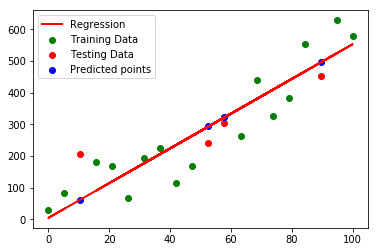

In [39]:
model=linear_model.LinearRegression()
result=model.fit(x_train,y_train)
pred_Y= model.predict(x_test)
print "MSE on test data is"
print mean_squared_error(y_test,pred_Y)

print "\nCoefficients :- ", result.coef_
print "Intercepts :- ", result.intercept_

line= float(result.intercept_)+float(result.coef_)*x_train

#visualize results
scatter(x=x_train, y=y_train, label='Training Data', c='g')
scatter(x=x_test, y=y_test, label='Testing Data', c='r')
scatter(x=x_test, y=pred_Y,label='Predicted points', c='b')
plot(x_train, line, color='red', linewidth=2, label='Regression')

legend(loc='best')

b)

for degree= 1 Training MSE -  5339.132052122131 Testing MSE -  6455.708453830028
for degree= 2 Training MSE -  3638.121777252989 Testing MSE -  4683.309906329012
for degree= 3 Training MSE -  3569.900366307117 Testing MSE -  4602.202716073115
for degree= 4 Training MSE -  2677.052078079777 Testing MSE -  5713.880623811586
for degree= 5 Training MSE -  2661.566074438385 Testing MSE -  6599.133077728244


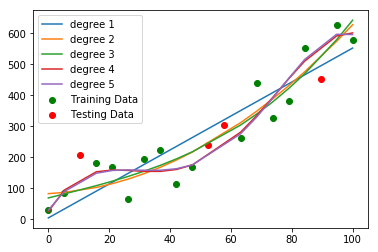

In [40]:
X = x_train
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

scatter(x=x_train, y=y_train, label='Training Data', c='g')
scatter(x=x_test, y=y_test, label='Testing Data', c='r')
mse_train=[]
mse_test=[]
for i in [1,2,3,4,5]:
    model = Pipeline([('poly', PolynomialFeatures(degree=i)),('linear', LinearRegression(fit_intercept=False))])
    result = model.fit(x_train, y_train)
    pred_Y_train= model.predict(x_train)
    pred_Y= model.predict(x_test)
    result.steps[1][1].coef_
    df=pd.DataFrame(np.array(x_train).tolist(),columns=['x_train'])
    df['pred_Y']=pd.DataFrame(np.array(pred_Y_train).tolist(),columns=['x_train'])
    df=df.sort_values(df.columns[0], ascending = True)
    plt.plot(df['x_train'],df['pred_Y'],label='degree '+str(i))
    legend(loc='best')
    mse_train.append(mean_squared_error(y_train,pred_Y_train))
    mse_test.append(mean_squared_error(y_test,pred_Y))
    print "for degree=", i,"Training MSE - ", mean_squared_error(y_train,pred_Y_train), "Testing MSE - ",mean_squared_error(y_test,pred_Y)

plt.show()

*Note - Although the question asks for polynomials with degrees 1,2,3 and 5, we have showed even the polynomial with degree 4 in the above plot in order to show continuity and transition between the degrees.

c)

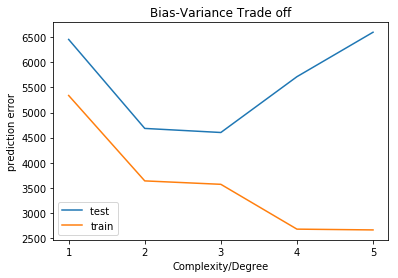

In [41]:
plot(pd.Series(mse_test,index=[1,2,3,4,5]),label='test ')
plot(pd.Series(mse_train,index=[1,2,3,4,5]),label='train')
xticks([1,2,3,4,5])
ylabel("prediction error")
xlabel("Complexity/Degree")
legend(loc='best')
title("Bias-Variance Trade off")
show()

As seen above, in part (c), the training error reduces as the degree of the polynomial increases. However increasing the degree of the polynomial function (because of overfitting) doesn't yield better test mean squared error.

To understand this better, lets understand it through bias-variance tradeoff. Bias in this case is the difference between the model's expected predictions and the true values i.e. how well it performs on an average. Variance refers to the model's sensitivity to different data set. Less complex models have low variance and high bias and as the complexity increases, these models tend to have low bias and high variance. Both the cases result in high mean square errors in testing set.

Hence, there needs to be a tradeoff between bias and variance. As a result, a tradeoff in the complexity of the model is necessary. As our model started increasing in complexity (increase in degree of polynomial) it helped the training data fit better. However, testing dataset is a proxy for true data and increasing complexity doesn't work well on testing data. After degree 3, we see that though the training error is dropping, but because of overfitting (high variance) our testing error is increasing. 

So we conclude that model with degree 3 performs the best because it gives least MSE on testing set. However there's very small difference in test MSE between degree 2 and degree 3. So, if we prefer lesser complex model, we suggest to go with degree 2 model.  


# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

(a) (1pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

(b) (4pts) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

(c) (4pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

(d) (4pts) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

a)

In [43]:
print data.shape
data[:5]

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


b)

17     114.0
102    100.9
76      89.4
166     84.8
119     79.2
Name: Newspaper, dtype: float64

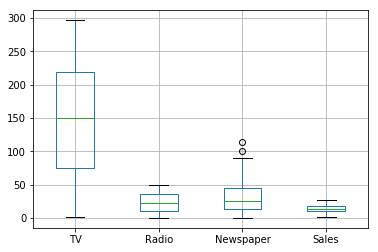

In [44]:
data.boxplot()
data['Newspaper'].sort_values(ascending=False)[:5]

According to the boxplots, it can be seen that only the newspaper column has 2 outliers and the values > 100 are classified as outliers. The exact Newspaper column outliers are 114 and 100.9. If the boxplots and cut-offs for the rest of the columns are observed, they dont seem to have outliers. 

Cut-offs according to the boxplot:
TV ~ 300
Radio ~ 50
Newspaper ~ 90
Sales ~ 30

c)

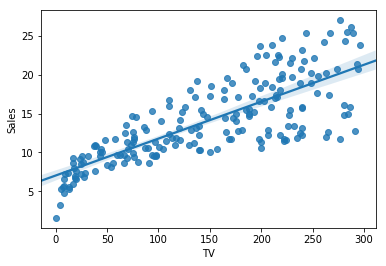

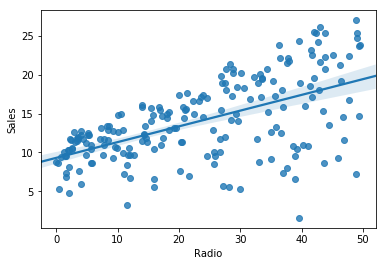

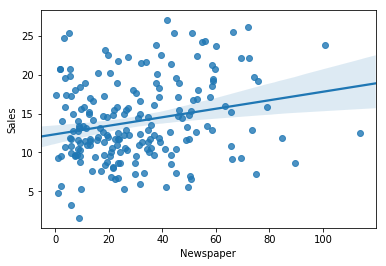

In [45]:
import seaborn as sns
sns.regplot(data['TV'],data['Sales'])
plt.show()
sns.regplot(data['Radio'],data['Sales'])
plt.show()
sns.regplot(data['Newspaper'],data['Sales'])
plt.show()

Tv & Sales seems have better fit followed by Radio & Sales because of the linear relationship between the variables
The spread of the data in case of Newspaper & Sales looks comparatively non-linear. Hence, the fit suffers.

d)

In [46]:
import numpy as np
data1 = np.genfromtxt('data_q1.csv', delimiter=',')
TV= data1[1:,1].reshape(-1, 1)
Sales = data1[1:,4].reshape(-1, 1)

model=linear_model.LinearRegression()
result=model.fit(TV,Sales)
print "\nRegression coefficient of TV:", result.coef_
print "Intercept:", result.intercept_


Regression coefficient of TV: [[0.04753664]]
Intercept: [7.03259355]


According to our result, an additional amount of $10,000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product (in this case, TVs)

Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

(e) (4pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

(f) (2pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

(g) (1pts) Report the coefficients obtained by your model.

In [47]:
X = data.drop(['Sales'],axis=1)
Y = data['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

e)

In [48]:
from sklearn.metrics import mean_squared_error
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)
pred_Y= model.predict(X_test)
print " RMSE", sqrt(mean_squared_error(Y_test,pred_Y, sample_weight=None, multioutput='uniform_average'))

 RMSE 1.93078438223472


f)

In [49]:
pred_Y_train= model.predict(X_train)
train_error=mean_squared_error(Y_train,pred_Y_train, sample_weight=None, multioutput='uniform_average')
print " MSE train",train_error
pred_Y= model.predict(X_test)
test_error=mean_squared_error(Y_test,pred_Y, sample_weight=None, multioutput='uniform_average')
print " MSE test", test_error
print "Increase in error ", test_error-train_error
print "%Increase in error ", round(((test_error-train_error)/train_error)*100,2),"%"


 MSE train 2.410858654557854
 MSE test 3.7279283306815088
Increase in error  1.3170696761236549
%Increase in error  54.63 %


g)

In [50]:
coeffs_table=pd.DataFrame(list(model.coef_),list(X.iloc[:,:].columns),columns=['Coefficients'])
coeffs_table

,Coefficients
TV,0.044665
Radio,0.196630
Newspaper,0.006074


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [51]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

a) (2 points) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

b)  (3 points) Now fit the regression model using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

c) (2 points ) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

d) (3 points) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

e) (5 points) Calaculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

a)

In [53]:
from sklearn.metrics import mean_squared_error
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
pred_Y_train=model.predict(X_train)
pred_Y= model.predict(X_test)
RMSE_train=sqrt(mean_squared_error(y_train,pred_Y_train, sample_weight=None, multioutput='uniform_average'))
RMSE_test=sqrt(mean_squared_error(y_test,pred_Y, sample_weight=None, multioutput='uniform_average'))
print " RMSE train", RMSE_train
print " RMSE test", RMSE_test
print " Increase ", RMSE_test-RMSE_train
print " % Increase ",  round(((RMSE_test-RMSE_train)/RMSE_train)*100,2),"%"
    


 RMSE train 52.007732294217874
 RMSE test 57.428059772853565
 Increase  5.420327478635691
 % Increase  10.42 %


b)

In [54]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

huber = HuberRegressor(alpha=0.0).fit(X_train, y_train)
pred_Y_train=huber.predict(X_train)
pred_Y= huber.predict(X_test)
RMSE_train=sqrt(mean_squared_error(y_train,pred_Y_train, sample_weight=None, multioutput='uniform_average'))
RMSE_test=sqrt(mean_squared_error(y_test,pred_Y, sample_weight=None, multioutput='uniform_average'))
print " RMSE train", RMSE_train
print " RMSE test", RMSE_test




 RMSE train 52.16357275654772
 RMSE test 57.15007488048903


## In case of outliers

In [55]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0


c)

In [56]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train_outliers)
pred_Y_train=model.predict(X_train)
pred_Y= model.predict(X_test)
RMSE_train=sqrt(mean_squared_error(y_train_outliers,pred_Y_train, sample_weight=None, multioutput='uniform_average'))
RMSE_test=sqrt(mean_squared_error(y_test,pred_Y, sample_weight=None, multioutput='uniform_average'))
print " RMSE train", RMSE_train
print " RMSE test", RMSE_test

 RMSE train 286.2641030656008
 RMSE test 82.21820407137496


d)

In [57]:
huber = HuberRegressor(alpha=0.0).fit(X_train, y_train_outliers)
pred_Y_train=huber.predict(X_train)
pred_Y_outlier= huber.predict(X_test)
RMSE_train_outlier=sqrt(mean_squared_error(y_train_outliers,pred_Y_train, sample_weight=None, multioutput='uniform_average'))
RMSE_test_outlier=sqrt(mean_squared_error(y_test,pred_Y_outlier, sample_weight=None, multioutput='uniform_average'))
print " RMSE train", RMSE_train_outlier
print " RMSE test", RMSE_test_outlier

 RMSE train 290.2226909607711
 RMSE test 57.56522357131555


In [58]:
#Comparing RMSEs of both cost functions in case of outliers

In [59]:
print "% drop in test RMSE in case of outlier ", round((abs(RMSE_test_outlier-RMSE_test)/RMSE_test)*100,2),"%"

% drop in test RMSE in case of outlier  29.98 %


Huber loss is more robust to outliers than a squared error loss.
Hence we see that there is a significant drop in test RMSE when huber regressor is used

e)

In [60]:
Residuals=pred_Y-y_test
Residuals_outliers=pred_Y_outlier-y_test

In [61]:
df=pd.DataFrame()
df['1']=pred_Y
df['2']=y_test
df['3']=pred_Y_outlier


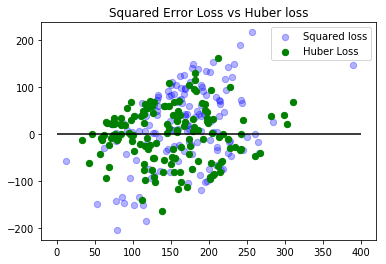

In [62]:
#Squared Error Loss"
scatter(pred_Y,pred_Y-y_test,label='Squared loss',c='b',s=40,alpha=0.3)
title("Squared Error Loss vs Huber loss")
scatter(pred_Y_outlier,pred_Y_outlier-y_test,label='Huber Loss',c='g',s=40)
hlines(y=0,xmin=0,xmax=400)
legend(loc='best')
show()

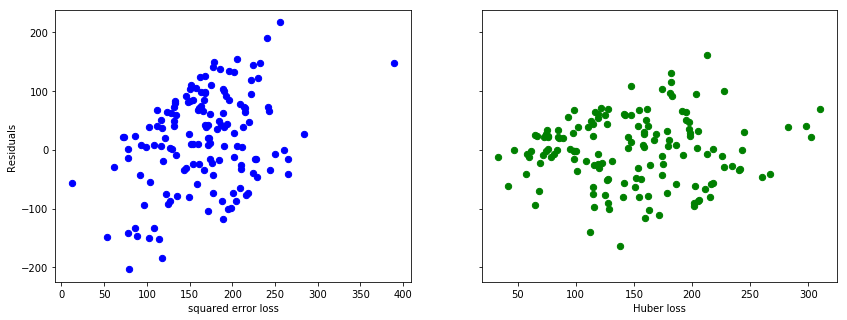

In [63]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(14, 5))

# Plot the squared error loss scatter plot
ax1.scatter(pred_Y,pred_Y-y_test,label='Squared loss',c='b',s=40)
ax1.set_xlabel('squared error loss')
ax1.set_ylabel('Residuals')

# Plot the huber scatterplot on the second subplot
ax2.scatter(pred_Y_outlier,pred_Y_outlier-y_test,label='Huber Loss',c='g',s=40)
ax2.set_xlabel('Huber loss')
show()

Huber loss regressor is better because residuals have lower values than that of squared loss regressor

Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

f) (5 points ) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

g) (5 points) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [64]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


In [158]:
Xn=pd.DataFrame(X)


f) Backward Selection

In [65]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, 3, step=1)
selector = selector.fit(X_train, y_train)
print selector.ranking_
getting_features=pd.DataFrame(list(feature_name),list(selector.ranking_)).reset_index()

[5 8 1 1 6 7 2 3 1 4]


In [66]:
pd.DataFrame(list(feature_name),list(selector.ranking_)).sort_index(ascending=True)[:3]

,0
1,x3
1,x4
1,x9


x3,x4,x9 are three most significant factors using backward selection

In [159]:
def stepwise_selection(Xn, Y,
                      initial_list=Xn.columns,
                      threshold_in=0.000001,
                      threshold_out = 0.005,
                      verbose=True):

    included = list(initial_list)
    while True:
        changed=False

   # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(Xn[included]))).fit()
       # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print 'Feature {} dropped with p-value {}'.format(worst_feature, worst_pval)
               
        if not changed:
            break
    print model.summary()
    return included

result = stepwise_selection(Xn, Y)
print '\nResulting features:-'
print result
print model.summary()

Feature 0 dropped with p-value 0.866999817991
Feature 6 dropped with p-value 0.638562155688
Feature 9 dropped with p-value 0.304021922329
Feature 7 dropped with p-value 0.261917591426
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           3.01e-65
Time:                        17:04:24   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    s

C:\Users\juigu\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


*Note - Since the features are named from x1 to x10 so we are just adding 1 to the resulting features to match with our original naming 

x9,x3,x4 (highest t-values) are the most important features according to backward selection results 

g) Forward Selection

In [162]:

import statsmodels.api as sm

def stepwise_selection(Xn, Y, 
                       initial_list=[], 
                       threshold_in=0.000001, 
                       threshold_out = 0.005, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(Xn.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant(pd.DataFrame(Xn[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.values.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print 'Feature {} added with p-value {}'.format(best_feature, best_pval)

        if not changed:
            break
    print model.summary()
    return included

result = stepwise_selection(Xn, Y)

Feature 2 added with p-value 3.46600644517e-42
Feature 7 added with p-value 3.03967927824e-20
Feature 6 added with p-value 6.64538996007e-14
Feature 5 added with p-value 2.92146136854e-15
Feature 4 added with p-value 3.32373629752e-13
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     60.57
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           2.19e-54
Time:                        17:10:50   Log-Likelihood:                -2413.0
No. Observations:                 442   AIC:                             4840.
Df Residuals:                     435   BIC:                             4869.
Df Model:                           6                                         
Covariance Type:            nonrobust                 

*Note - Since the features are named from x1 to x10 so we are just adding 1 to the resulting features to match with our original naming

x3,x5,x10 (least t-values) are the most important features according to forward selection results


# x3 is the only common most important feature spotted in both the forward and backward selection

# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) (2pts) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) (2pts) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) (1pts) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Answer

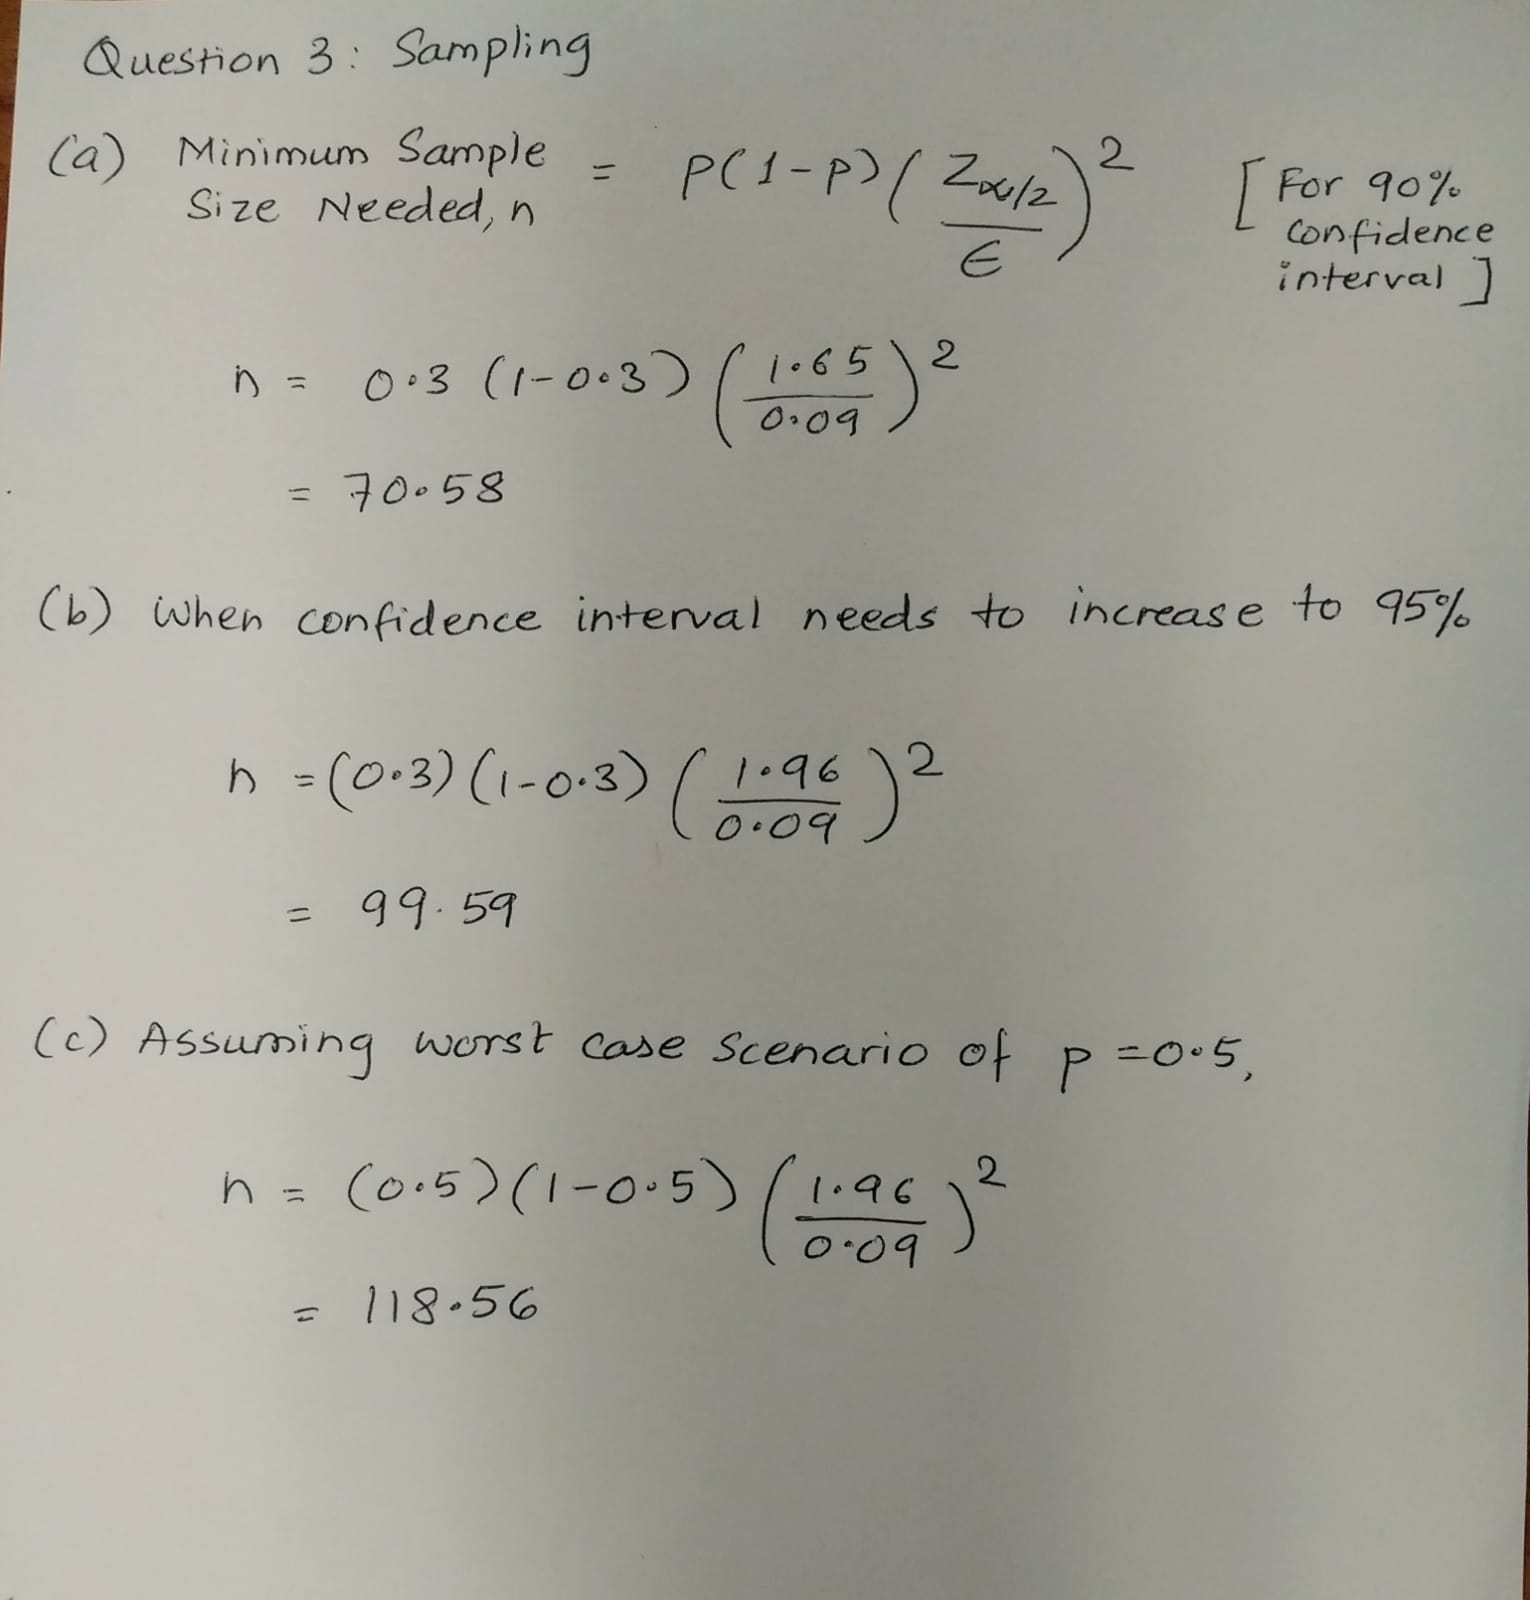

In [164]:
from IPython.display import Image
Image(filename='APM Sampling.jpeg')

# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [70]:
import pandas as pd

df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)


(a) (3pts) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

(b) (2pts) Find the names of the six countries with the highest first component (these should be clear outliers).

(c) (3pts) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

(d) (2pts) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

a)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
#PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power=’auto’, random_state=None)
print pca.explained_variance_ratio_
print pca.singular_values_

[0.45836493 0.17055199]
[122.61845903  74.79603165]


In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf.set_index(df.index,inplace=True)

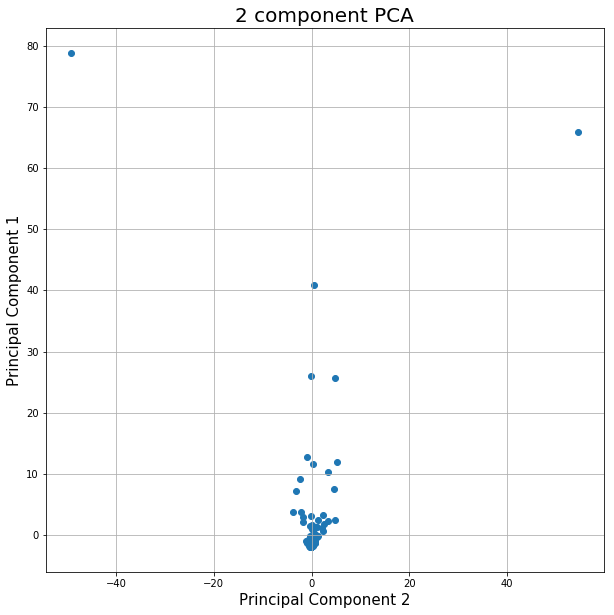

In [74]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 2'],principalDf['principal component 1'])
ax.grid()

b)

In [75]:
principalDf['principal component 1'].sort_values(ascending=False)[:6]

Country
China      78.808512
Canada     65.904733
Mexico     40.812633
Japan      26.098581
Germany    25.743293
Italy      12.843229
Name: principal component 1, dtype: float64

From the graph we can see that there are 6 countries that are clear outliers because they dont belong to the cluster. Also their corresponding PC1 values are higher (>12) and the above table also proves the same.

c) i)

[0.45836493 0.17055199 0.07440202 0.05409281 0.03208909 0.02285287
 0.0183737  0.01727886 0.01485018 0.01397203 0.01196725 0.0103584
 0.00950959 0.00899353 0.00804939 0.00774479 0.00708056 0.00692228
 0.00657592 0.00561115 0.00501338 0.00405669 0.00368348 0.0033721
 0.00249911 0.00228959 0.0018147  0.00164874 0.0015655  0.00140566]


Text(0.5,0,'Principal Component')

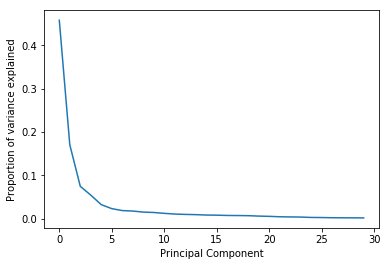

In [76]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(df_scaled)
var= pca.explained_variance_ratio_
print var
plot(range(30),var)
ylabel("Proportion of variance explained")
xlabel("Principal Component")

c) ii)

[45.84 62.9  70.34 75.75 78.96 81.25 83.09 84.82 86.31 87.71 88.91 89.95
 90.9  91.8  92.6  93.37 94.08 94.77 95.43 95.99 96.49 96.9  97.27 97.61
 97.86 98.09 98.27 98.43 98.59 98.73]


Text(0.5,0,'Principal Component')

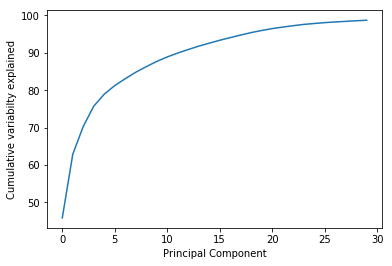

In [77]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1
plot(range(30),var1)
ylabel("Cumulative variabilty explained")
xlabel("Principal Component")

d)

In [78]:
variance=[0.3,0.6,0.9]
for i in variance:
    pca=PCA(i)
    pca.fit(df_scaled)
    print "For variance = ", i, " min principal components required is ", pca.n_components_ 

For variance =  0.3  min principal components required is  1
For variance =  0.6  min principal components required is  2
For variance =  0.9  min principal components required is  13


# Question 5. PCA (conceptual) (10pts)

(a) (5pts) Give two reasons why we might want to use PCA.

(b) (5pts) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

Answer (a)

- Dimensionality Reduction :- PCA is a method of dimensionality reduction. Many times we encounter data with a large number of variables, a few of which might even be correlated. This correlation between variables brings some amount of redundancy to the dataset. This in turn, increases computational and cost complexities. PCA transforms the original variables to the linear combination of these variables which are independent.In this way, PCA offers reduced complexity and a better, realistic perspective

- Better data Visualization :- PCA is a method that helps emphasize variation in the data and bring out strong patterns in the dataset. This makes it way easier to explore and visualize the data. PCA is a classical linear projection method that is fast and easy to compute, while simultaneously preserves as much data variance as possible. While traditional visualization methods are unable to capture the non-linear nature of data and are inadequate to characterize strong overlapping data, PCA overcomes these drawbacks to prove an extremely effective method for data visualization.

Part (b)

- PCA stands for Principal Component Analysis, it is literally used to find principal components of the data. When we say PCA is useful in measuring data in terms of its principal components rather than on a normal x-y axis, the principal components actually mean the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. PCA is always performed on a symmetric correlation or covariance matrix. This means the matrix should be numeric and have standardized data.

- A set of data points can be deconstructed into eigenvectors and eigenvalues. Eigenvectors and eigenvalues exist in pairs - every eigenvector has a corresponding eigenvalue. An eigenvector is a direction and an eigenvalue is a number, telling how much variance there is in the data in that direction or line. The eigenvector with the highest eigenvalue is therefore the principal component. There are not many eigenvectors-eigenvalues in a dataset. The amount of eigenvectors-eigenvalues that exist equals the number of dimensions the data set has. For instance, if there are 2 variables, then it is a 2 dimensional data set, therefore there are 2 eigenvectors-eigenvalues. If there are 3 variables, 3-D data set, so 3 eigenvectors-eigenvalues. The reason for this is that eigenvectors put the data into a new set of dimensions, and these new dimensions have to be equal to the original amount of dimensions. 
